# Setup

In [1]:
import numpy as np
import pandas as pd
from nltk.probability import FreqDist
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
from collections import Counter
import collections
%matplotlib inline

# Data

team name

In [2]:
df = pd.DataFrame(['data hawks', 'abraca data', 'deep thinkers', 'data junkies', 'data punks'], columns =['name'])

In [3]:
df

,name
0,data hawks
1,abraca data
2,deep thinkers
3,data junkies
4,data punks


relative frequency of English letters

In [4]:
english_letter_freq_dict = {'a': 0.08167, 'n': 0.06749, 'b': 0.01492, 'o': 0.07507, 'c': 0.02782, 'p': 0.01929, 'd': 0.04253, 'q': 0.00095, 'e': 0.12702, 'r': 0.05987, 'f': 0.02228, 's': 0.06327, 'g': 0.02015, 't': 0.09056, 'h': 0.06094, 'u': 0.02758, 'i': 0.06966, 'v': 0.00978, 'j': 0.00153, 'w': 0.0236, 'k': 0.00772, 'x': 0.0015, 'l': 0.04025, 'y': 0.01974, 'm': 0.02406, 'z': 0.00074}

In [5]:
collections.OrderedDict(sorted(english_letter_freq_dict.items()))

OrderedDict([('a', 0.08167),
             ('b', 0.01492),
             ('c', 0.02782),
             ('d', 0.04253),
             ('e', 0.12702),
             ('f', 0.02228),
             ('g', 0.02015),
             ('h', 0.06094),
             ('i', 0.06966),
             ('j', 0.00153),
             ('k', 0.00772),
             ('l', 0.04025),
             ('m', 0.02406),
             ('n', 0.06749),
             ('o', 0.07507),
             ('p', 0.01929),
             ('q', 0.00095),
             ('r', 0.05987),
             ('s', 0.06327),
             ('t', 0.09056),
             ('u', 0.02758),
             ('v', 0.00978),
             ('w', 0.0236),
             ('x', 0.0015),
             ('y', 0.01974),
             ('z', 0.00074)])

# Analyze:

## Length

In [6]:
df['length'] = [len(x) for x in df.name] 

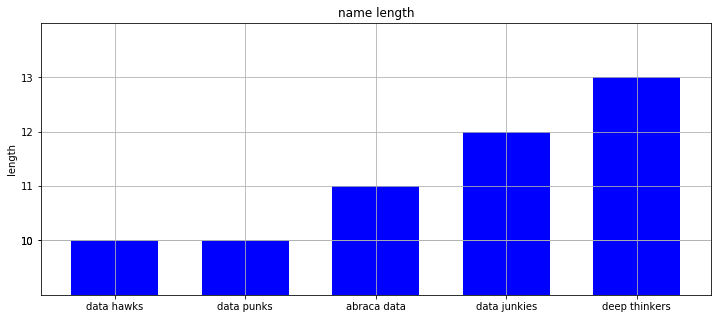

In [7]:
plt.figure(figsize = (12,5))
width = 2/3
plt.bar(df.sort_values(['length'])['name'], df.sort_values(['length'])['length'], width, color="blue")
plt.yticks(df.sort_values(['length'])['length'])
plt.ylabel('length')
plt.title('name length')
plt.ylim(9,14)
plt.grid(True)
plt.show()

## Letter Frequency

In [8]:
df['frequency']  = [Counter(df['name'][i].replace(' ','')).most_common() for i in range(len(df))]

In [9]:
for item in df[['name', 'frequency']].values:
    print(item)  
    print()

['data hawks'
 list([('a', 3), ('d', 1), ('t', 1), ('h', 1), ('w', 1), ('k', 1), ('s', 1)])]

['abraca data'
 list([('a', 5), ('b', 1), ('r', 1), ('c', 1), ('d', 1), ('t', 1)])]

['deep thinkers'
 list([('e', 3), ('d', 1), ('p', 1), ('t', 1), ('h', 1), ('i', 1), ('n', 1), ('k', 1), ('r', 1), ('s', 1)])]

['data junkies'
 list([('a', 2), ('d', 1), ('t', 1), ('j', 1), ('u', 1), ('n', 1), ('k', 1), ('i', 1), ('e', 1), ('s', 1)])]

['data punks'
 list([('a', 2), ('d', 1), ('t', 1), ('p', 1), ('u', 1), ('n', 1), ('k', 1), ('s', 1)])]



## Unique char

In [10]:
df['unique_char'] = [len(x) for x in df['frequency'] ]

In [11]:
df.sort_values(['unique_char']) 

,name,length,frequency,unique_char
1,abraca data,11,"[(a, 5), (b, 1), (r, 1), (c, 1), (d, 1), (t, 1)]",6
0,data hawks,10,"[(a, 3), (d, 1), (t, 1), (h, 1), (w, 1), (k, 1...",7
4,data punks,10,"[(a, 2), (d, 1), (t, 1), (p, 1), (u, 1), (n, 1...",8
2,deep thinkers,13,"[(e, 3), (d, 1), (p, 1), (t, 1), (h, 1), (i, 1...",10
3,data junkies,12,"[(a, 2), (d, 1), (t, 1), (j, 1), (u, 1), (n, 1...",10


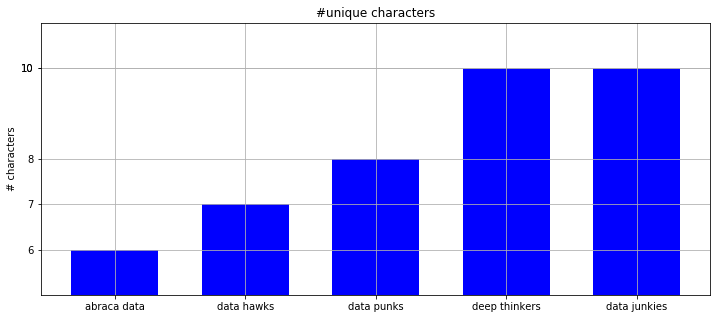

In [12]:
plt.figure(figsize = (12,5))
width = 2/3
temp_df = df.sort_values(['unique_char']) 
plt.bar(temp_df['name'], temp_df['unique_char'], width, color="blue")
plt.yticks(temp_df['unique_char'])
plt.ylabel('# characters')
plt.title('#unique characters')
plt.ylim(5,11)
plt.grid(True)
plt.show()

# Stem

In [13]:
st = PorterStemmer()

In [14]:
stem_name = []
for n in df['name']:
    stem_name.append([st.stem(word) for word in n.split()])

In [15]:
df['stem_name'] = [' '.join(st_n) for st_n in stem_name]

In [16]:
df[['name', 'stem_name']]

,name,stem_name
0,data hawks,data hawk
1,abraca data,abraca data
2,deep thinkers,deep thinker
3,data junkies,data junki
4,data punks,data punk


## Probabilities

Calculate the probability of the word based on the relative frequency of English letters

assume uniform distribution and assume the choice of the letters are independen P(A,B) = P(A)*P(B) using chain rule; only unigram is considered as lack of data on bigram, and trigram 

In [17]:
print('sum of relative frequencies', np.sum(list(english_letter_freq_dict.values())))

sum of relative frequencies 0.9999899999999999


In [18]:
name_probs = []
name_probs_normalized = []
names = []

for i, name in enumerate(df['name']):
    chars = list(name.replace(' ',''))
    prob_name = 0
    for char in chars:
        prob_name += (english_letter_freq_dict[char])
    name_probs_normalized.append(prob_name/df['length'][i])
    name_probs.append(prob_name)
    names.append(name)

In [19]:
df['probability_chars'] = name_probs
df['probability_chars_normalized'] = name_probs_normalized

In [20]:
df[['name', 'probability_chars', 'probability_chars_normalized']]

,name,probability_chars,probability_chars_normalized
0,data hawks,0.53363,0.053363
1,abraca data,0.64405,0.058550
2,deep thinkers,0.86239,0.066338
3,data junkies,0.66070,0.055058
4,data punks,0.48178,0.048178


# Entropy

In [21]:
def calc_shannon_entropy(p):
    return -p*np.log(p)

In [22]:
def calc_entropy(r,l):
    return np.log2(r**l)

In [23]:
entropy = []
shannon_entropy = []
shannon_entropy_normalized = []
for i in range(len(df)):
    row = df.iloc[i]
    entropy.append(calc_entropy(r = row['unique_char'], l =row['length']))
    shannon_entropy.append(calc_shannon_entropy(row['probability_chars']))
    shannon_entropy_normalized.append(calc_shannon_entropy(row['probability_chars_normalized']))

In [24]:
df['entropy'] = entropy
df['shannon_entropy'] = shannon_entropy
df['shannon_entropy_normalized'] = shannon_entropy_normalized

In [25]:
df[['name', 'entropy', 'shannon_entropy', 'shannon_entropy_normalized']]

,name,entropy,shannon_entropy,shannon_entropy_normalized
0,data hawks,28.073549,0.335148,0.156388
1,abraca data,28.434588,0.283368,0.166158
2,deep thinkers,43.185065,0.127675,0.179974
3,data junkies,39.863137,0.273831,0.159634
4,data punks,30.000000,0.351828,0.146117


Entropy measures the randomness of the combination, less entropy better combination 

----------------------

In [26]:
df

,name,length,frequency,unique_char,stem_name,probability_chars,probability_chars_normalized,entropy,shannon_entropy,shannon_entropy_normalized
0,data hawks,10,"[(a, 3), (d, 1), (t, 1), (h, 1), (w, 1), (k, 1...",7,data hawk,0.53363,0.053363,28.073549,0.335148,0.156388
1,abraca data,11,"[(a, 5), (b, 1), (r, 1), (c, 1), (d, 1), (t, 1)]",6,abraca data,0.64405,0.058550,28.434588,0.283368,0.166158
2,deep thinkers,13,"[(e, 3), (d, 1), (p, 1), (t, 1), (h, 1), (i, 1...",10,deep thinker,0.86239,0.066338,43.185065,0.127675,0.179974
3,data junkies,12,"[(a, 2), (d, 1), (t, 1), (j, 1), (u, 1), (n, 1...",10,data junki,0.66070,0.055058,39.863137,0.273831,0.159634
4,data punks,10,"[(a, 2), (d, 1), (t, 1), (p, 1), (u, 1), (n, 1...",8,data punk,0.48178,0.048178,30.000000,0.351828,0.146117
